In [549]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [550]:
data = pd.read_csv('Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [551]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [552]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [553]:
data['Country'] = data['Country'].apply(lambda x: 'UK and North Ireland' if x == 'United Kingdom of Great Britain and Northern Ireland' else x)

In [554]:
data_2013 = data[data['Year'] == 2013]
data_2013.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
50,Angola,2013,Developing,51.1,355.0,69,8.10,35.958573,77.0,8523,...,67.0,4.26,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.864160,NaN,3.3,3.3,0.781,13.9
82,Argentina,2013,Developing,76.0,119.0,8,8.28,1001.796332,94.0,0,...,99.0,4.99,94.0,0.1,12976.636420,42539925.0,1.0,0.9,0.823,17.3
98,Armenia,2013,Developing,74.4,123.0,1,3.79,279.429081,95.0,10,...,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,2.1,0.736,12.7
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.853810,91.0,158,...,91.0,9.36,91.0,0.1,67792.338600,23117353.0,0.6,0.6,0.933,20.3
130,Austria,2013,Developed,81.1,68.0,0,11.82,90.585012,95.0,0,...,95.0,11.14,95.0,0.1,554.715320,8479375.0,1.8,2.0,0.887,15.7
146,Azerbaijan,2013,Developing,72.2,121.0,5,2.14,275.651493,93.0,164,...,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9


In [555]:
data_2013['Country'].value_counts()

Country
Afghanistan      1
Lithuania        1
Nigeria          1
Niue             1
Norway           1
                ..
Grenada          1
Guatemala        1
Guinea           1
Guinea-Bissau    1
Zimbabwe         1
Name: count, Length: 193, dtype: int64

# Part a:
### Doing preprocess and visuallize the data.
# AND 
# Part b:
### Conduct the following tests. Include Null and Alternative hypothesis:

# The first ten country with th highest life expectanvy in 2013

C:\Users\hi\AppData\Local\Temp\ipykernel_16644\2060616805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_data, x='Country', y='Life expectancy ', palette='plasma')


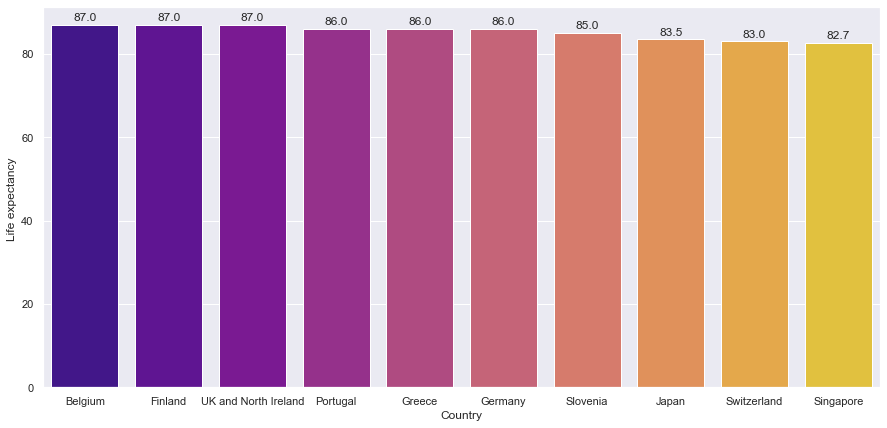

In [556]:
sorted_data = data_2013.sort_values('Life expectancy ', ascending=False).iloc[:10]

sns.set(style="darkgrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=sorted_data, x='Country', y='Life expectancy ', palette='plasma')

for index, value in enumerate(sorted_data['Life expectancy ']):
    plt.text(index, value + 1, str(value), ha='center')

# The last ten countries with the lowest life expectancy in 2013

C:\Users\hi\AppData\Local\Temp\ipykernel_16644\4275863629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_data_desc, x='Country', y='Life expectancy ', palette='plasma')


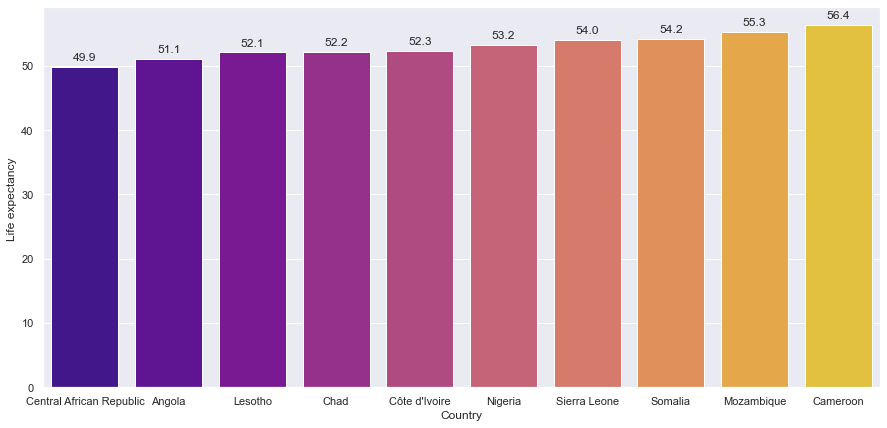

In [557]:
sorted_data_desc = data_2013.sort_values('Life expectancy ').iloc[:10]

sns.set(style="darkgrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=sorted_data_desc, x='Country', y='Life expectancy ', palette='plasma')

for index, value in enumerate(sorted_data_desc['Life expectancy ']):
    plt.text(index, value + 1, str(value), ha='center')

##### Part b:
##### i. Investigate the relationship between Status (Developed vs. Developing) and the prevalence of a disease (for example, "Hepatitis B" vaccination rates).

##### We will investigate the relationship between status and prevalence of "Hepatits B" (_Two sample t-test_)
##### $H_0: \mu_{developed} = \mu_{developing}$
##### $H_1: \mu_{developed} \neq \mu_{developing}$

C:\Users\hi\AppData\Local\Temp\ipykernel_16644\3347968487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Hepatitis B', palette='plasma')


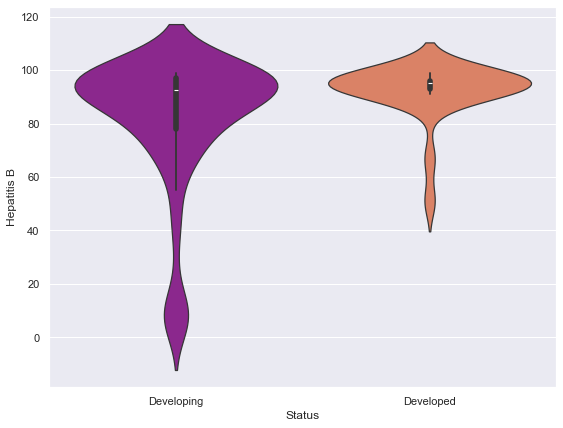

In [558]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Hepatitis B', palette='plasma')
plt.show()

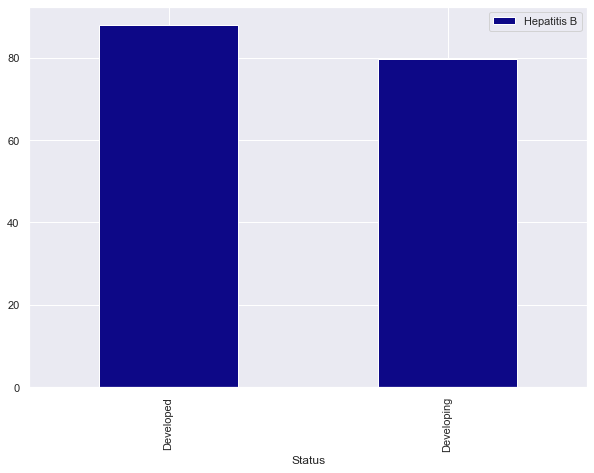

In [559]:
data2 = data.copy()
data2 = data2.drop(columns=['Country'])
data2.groupby('Status').mean().plot(kind='bar', y='Hepatitis B', figsize=(10, 7), colormap='plasma')
plt.show()

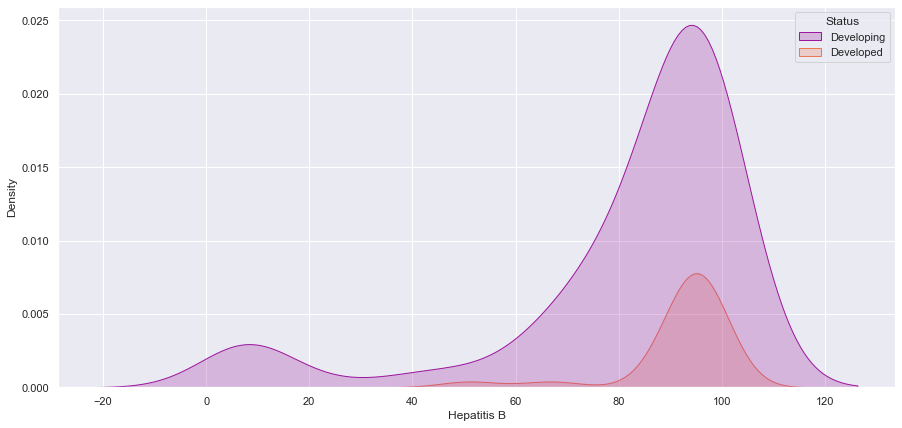

In [560]:
plt.figure(figsize=(15, 7))
sns.kdeplot(data=data_2013, x="Hepatitis B", hue="Status", fill=True, palette='plasma')
plt.show()

In [561]:
alpha = 0.05
stat, p_value = stats.ttest_ind(data_2013[data_2013['Status'] == 'Developed']['Hepatitis B'].dropna(), data_2013[data_2013['Status'] == 'Developing']['Hepatitis B'].dropna(), equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 0.05325713745511049
The null hypothesis will be accepted!


##### Part b:
##### ii. Compare the life expectancy ("Life expectancy") between two groups defined by the "Status" column (Developed vs. Developing countries).
##### (_Two sample t-test_) 
##### $H_0: \mu_{developed} = \mu_{developing}$
##### $H_1: \mu_{developed} \neq \mu_{developing}$

C:\Users\hi\AppData\Local\Temp\ipykernel_16644\2200567271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Life expectancy ', palette='plasma')


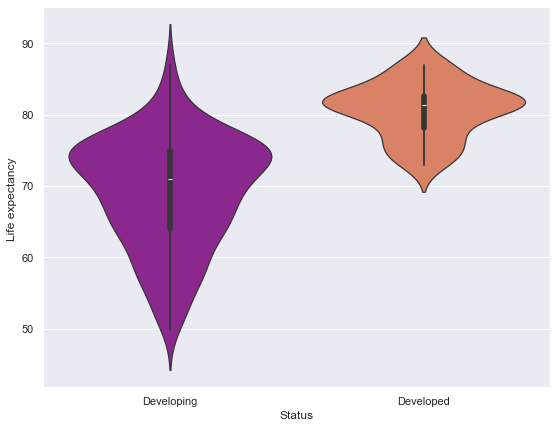

In [562]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Life expectancy ', palette='plasma')
plt.show()

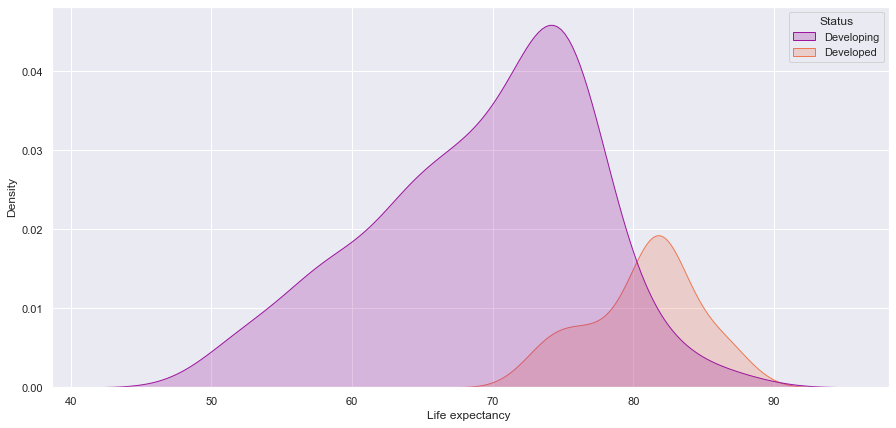

In [563]:
plt.figure(figsize=(15, 7))
sns.kdeplot(data=data_2013, x="Life expectancy ", hue="Status", fill=True, palette='plasma')
plt.show()

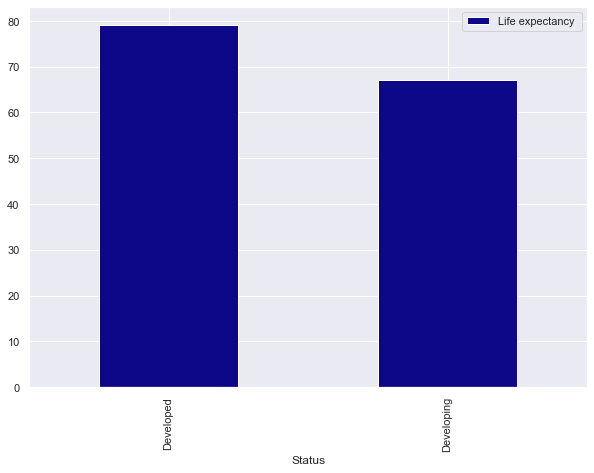

In [564]:
data2 = data.copy()
data2 = data2.drop(columns=['Country'])
data2.groupby('Status').mean().plot(kind='bar', y='Life expectancy ', figsize=(10, 7), colormap='plasma')
plt.show()

In [565]:
alpha = 0.05
stat, p_value = stats.ttest_ind(data_2013[data_2013['Status'] == 'Developed']['Life expectancy '].dropna(), data_2013[data_2013['Status'] == 'Developing']['Life expectancy '].dropna(), equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 5.775206655515912e-14
The null hypothesis will be rejected!


##### Part b:
##### iii. Compare the life expectancy ("Life expectancy") across multiple groups defined by the "Year" column.(_ANOVA_)
##### $H_0: \mu_{2000} = \mu_{2001} = \dots = \mu_{2015}$
##### $H_1: \mu_{2000} \neq \mu_{2001} \neq \dots \neq \mu_{2015}$

C:\Users\hi\AppData\Local\Temp\ipykernel_16644\1112383808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.violinplot(data=data, x='Year', y='Life expectancy ', palette='plasma')


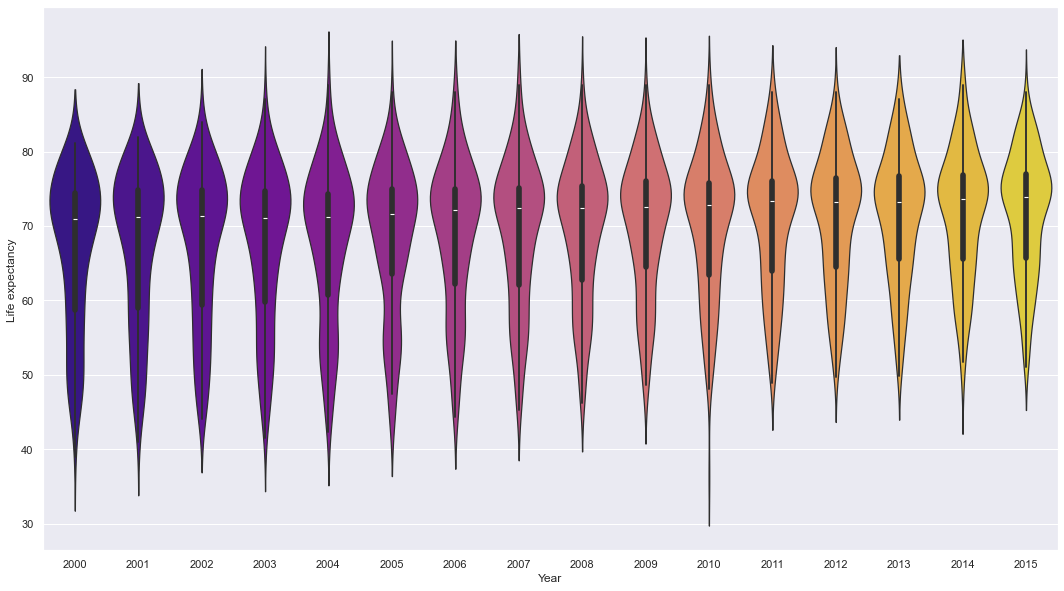

In [566]:
plt.figure(figsize=(40, 10))
plt.subplot(121), sns.violinplot(data=data, x='Year', y='Life expectancy ', palette='plasma')
plt.show()

In [567]:
alpha = 0.05
stat, p_value = stats.f_oneway(data[data['Year'] == 2000]['Life expectancy '].dropna(), data[data['Year'] == 2001]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2002]['Life expectancy '].dropna(), data[data['Year'] == 2003]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2004]['Life expectancy '].dropna(), data[data['Year'] == 2005]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2006]['Life expectancy '].dropna(), data[data['Year'] == 2007]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2008]['Life expectancy '].dropna(), data[data['Year'] == 2009]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2010]['Life expectancy '].dropna(), data[data['Year'] == 2011]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2012]['Life expectancy '].dropna(), data[data['Year'] == 2013]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2014]['Life expectancy '].dropna(), data[data['Year'] == 2015]['Life expectancy '].dropna())
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 4.508349816377376e-12
The null hypothesis will be rejected!


##### Part b:
##### iv. Design 2 more hypothesis tests to further explore the dataset.

##### 1. Investigate if schooling has effect on condumption of Alcohol.
##### $H_0: \mu_{high\_educated} = \mu_{low\_educated}$
##### $H_1: \mu_{high\_educated} \neq \mu_{low\_educated}$

In [568]:
high_educated = data_2013[data_2013['Schooling'] > 12.1]
low_educated = data_2013[data_2013['Schooling'] <= 12.1]
print(high_educated.shape)
print(low_educated.shape)

(114, 22)
(66, 22)


C:\Users\hi\AppData\Local\Temp\ipykernel_16644\983876482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_educated['Dataset'] = 'High'
C:\Users\hi\AppData\Local\Temp\ipykernel_16644\983876482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_educated['Dataset'] = 'Low'
C:\Users\hi\AppData\Local\Temp\ipykernel_16644\983876482.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for 

<Axes: xlabel='Dataset', ylabel='Alcohol'>

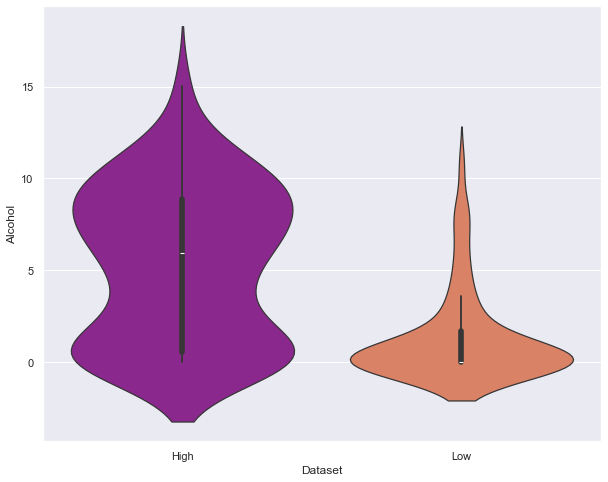

In [569]:
high_educated['Dataset'] = 'High'
low_educated['Dataset'] = 'Low'
merged_df = pd.concat([high_educated, low_educated])
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.violinplot(x='Dataset', y='Alcohol', data=merged_df, palette='plasma')

In [570]:
alpha = 0.05
stat, p_value = stats.ttest_ind(high_educated['Alcohol'].dropna(), low_educated['Alcohol'].dropna(), equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 2.203408074557782e-11
The null hypothesis will be rejected!


##### 2. How does the life expectancy affect the population of country.
##### $H_0: \mu_{high\_le} = \mu_{low\_le}$
##### $H_1: \mu_{high\_le} \neq \mu_{low\_le}$

In [571]:
high_le = data_2013[data_2013['Life expectancy '] > 72.1]
low_le = data_2013[data_2013['Life expectancy '] <= 72.1]
print(high_le.shape)
print(low_le.shape)

(99, 22)
(84, 22)


C:\Users\hi\AppData\Local\Temp\ipykernel_16644\1965333935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_le['Dataset'] = 'High'
C:\Users\hi\AppData\Local\Temp\ipykernel_16644\1965333935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_le['Dataset'] = 'Low'
C:\Users\hi\AppData\Local\Temp\ipykernel_16644\1965333935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

<Axes: xlabel='Dataset', ylabel='Population'>

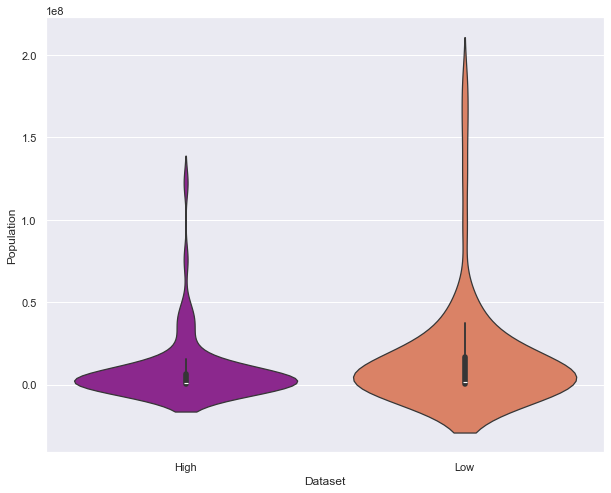

In [572]:
high_le['Dataset'] = 'High'
low_le['Dataset'] = 'Low'
merged_df = pd.concat([high_le, low_le])
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.violinplot(x='Dataset', y='Population', data=merged_df, palette='plasma')

In [573]:
alpha = 0.05
stat, p_value = stats.ttest_ind(high_le['Population'].dropna(), low_le['Population'].dropna(), equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 0.08691728718845994
The null hypothesis will be accepted!


<Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>

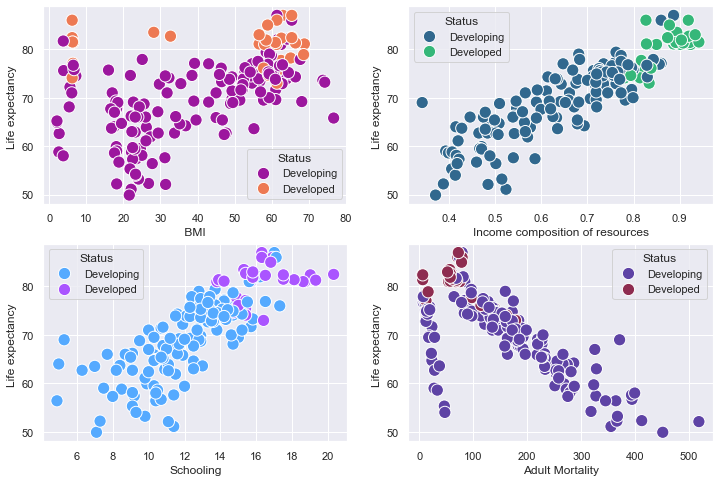

In [574]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(data=data_2013, x=' BMI ', y='Life expectancy ', hue='Status', ax=axs[0][0], palette='plasma', s=150)
sns.scatterplot(data=data_2013, x='Schooling', y='Life expectancy ', ax=axs[1][0], hue='Status', palette='cool', s=150)
sns.scatterplot(data=data_2013, x='Income composition of resources', y='Life expectancy ', hue='Status', ax=axs[0][1], palette='viridis', s=150)
sns.scatterplot(data=data_2013, x='Adult Mortality', y='Life expectancy ', hue='Status', ax=axs[1][1], palette='twilight', s=150)

<Axes: xlabel='Year', ylabel='Adult Mortality'>

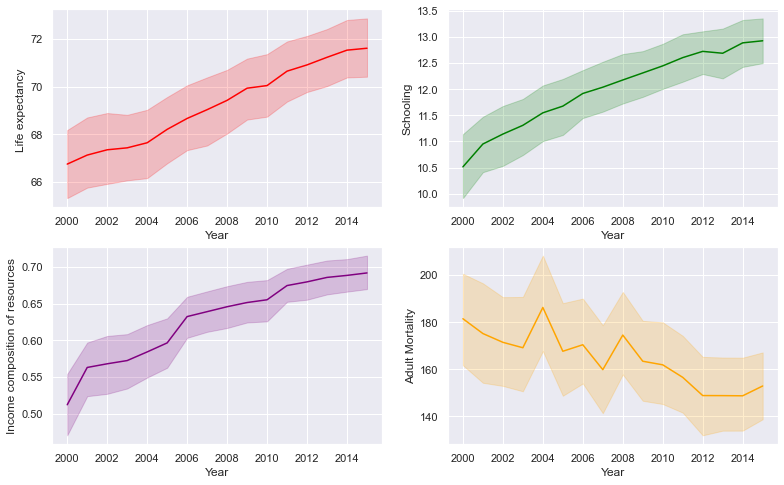

In [575]:
fig, axs = plt.subplots(2, 2, figsize=(13, 8))

sns.lineplot(data=data, x='Year', y='Life expectancy ', ax=axs[0][0], color='red')
sns.lineplot(data=data, x='Year', y='Schooling', ax=axs[0][1], color='green')
sns.lineplot(data=data, x='Year', y='Income composition of resources', ax=axs[1][0], color='purple')
sns.lineplot(data=data, x='Year', y='Adult Mortality', ax=axs[1][1], color='orange')

# Part c:
### Calculate the correlation between each variable and the target variable ("Life expectancy")

<Axes: >

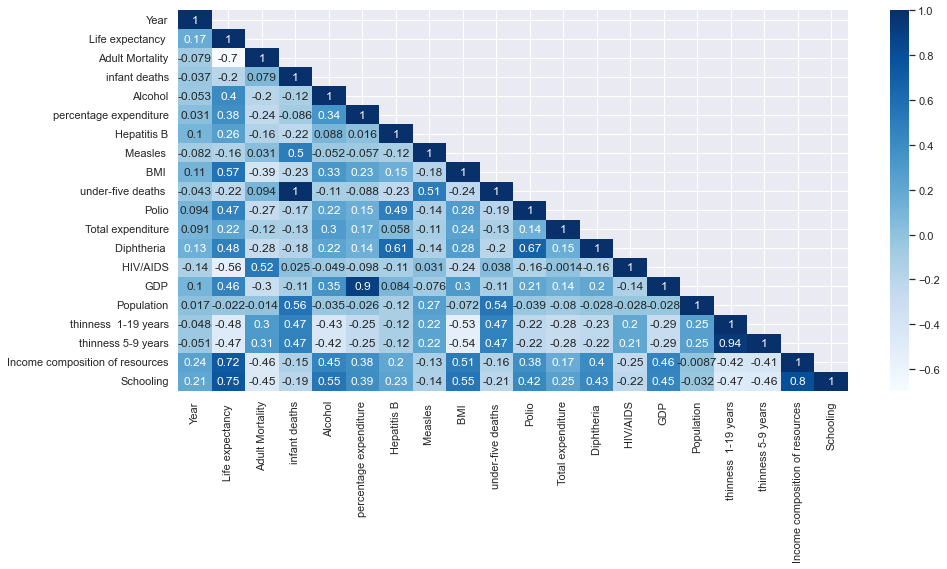

In [576]:
corr_matrix = data.select_dtypes(include='number').corr()
plt.figure(figsize=(15, 7))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool_))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

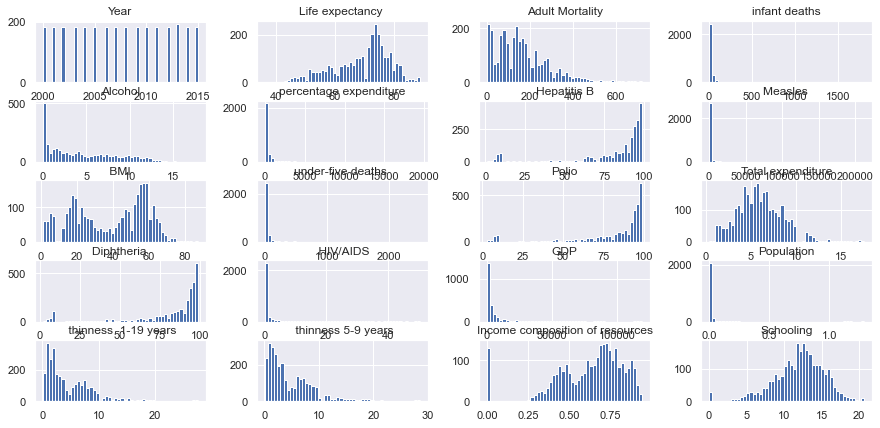

In [577]:
data.hist(bins=50, figsize=(15, 7))

# Part d:
### Test-train split your dataset such that there are no countries in both test and train splits. Now train two linear regression models, one including the column "Country" and another one with this column removed. How did it affect your model performance on test split? Which approach is correct?

In [578]:
# omitting outlier

def z_score_outlier(data):
    drop_outliers = np.array([])
    for column in data.columns:
        if (not data[column].dtype == 'object'):
            upper_bound = data[column].mean() + 3 * data[column].std()
            lower_bound = data[column].mean() - 3 * data[column].std()
            data = data.loc[(data[column] < upper_bound) & (data[column] > lower_bound)]

    return data

In [579]:
no_country_data = data.drop(columns=['Country'])
country_data = data.copy()

In [580]:
# encoding categorical data (country_data)
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()

countries = pd.DataFrame(data['Country'], columns=['Country'])
countries = oh_encoder.fit_transform(countries).toarray()
newCountry = pd.DataFrame(countries, columns=oh_encoder.categories_, index=country_data.index)
country_data = country_data.drop(columns=['Country'])
country_data = pd.concat([country_data, newCountry], axis=1)
country_data.rename(columns=''.join, inplace=True)

status = pd.DataFrame(country_data['Status'], columns=['Status'])
status = oh_encoder.fit_transform(status).toarray()
newStatus = pd.DataFrame(status, columns=oh_encoder.categories_, index=country_data.index)
country_data = country_data.drop(columns=['Status'])
country_data = pd.concat([country_data, newStatus], axis=1)
country_data.rename(columns=''.join, inplace=True)
country_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [581]:
# encoding categorical data (no_country_data)

no_country_data = no_country_data.drop(columns=['Status'])
no_country_data = pd.concat([no_country_data, newStatus], axis=1)
no_country_data.rename(columns=''.join, inplace=True)
no_country_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0,1.0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0,1.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0,1.0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0,1.0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0,1.0


In [582]:
column = country_data.pop('Life expectancy ')
country_data.insert(214, 'Life expectancy ', column)

column = no_country_data.pop('Life expectancy ')
no_country_data.insert(21, 'Life expectancy ', column)

In [583]:
# splitting trian-test
from sklearn.model_selection import train_test_split

country_train, country_test = train_test_split(country_data, train_size=0.8, random_state=42)
print(country_train.shape)
print(country_test.shape)

no_country_train, no_country_test = train_test_split(no_country_data, train_size=0.8, random_state=42)
print(no_country_train.shape)
print(no_country_test.shape)

(2350, 215)
(588, 215)
(2350, 22)
(588, 22)


In [584]:
# Imputing null values
from sklearn.impute import SimpleImputer

country_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
no_country_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
country_train = pd.DataFrame(country_mean_imputer.fit_transform(country_train), columns=country_train.columns, index=country_train.index)
no_country_train = pd.DataFrame(no_country_mean_imputer.fit_transform(no_country_train), columns=no_country_train.columns, index=no_country_train.index)

In [585]:
print(country_train.isnull().sum())
print(no_country_train.isnull().sum())

Year                      0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
                         ..
Zambia                    0
Zimbabwe                  0
Developed                 0
Developing                0
Life expectancy           0
Length: 215, dtype: int64
Year                               0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0


In [586]:
country_test = pd.DataFrame(country_mean_imputer.transform(country_test), columns=country_test.columns, index=country_test.index)
no_country_test = pd.DataFrame(no_country_mean_imputer.transform(no_country_test), columns=no_country_test.columns, index=no_country_test.index)

In [587]:
from sklearn.preprocessing import MinMaxScaler

country_scaler = MinMaxScaler()
no_country_scaler = MinMaxScaler()

country_train = country_scaler.fit_transform(country_train)
no_country_train = no_country_scaler.fit_transform(no_country_train)

country_test = country_scaler.transform(country_test)
no_country_test = no_country_scaler.transform(no_country_test)

In [589]:
c_train_x = country_train[:, :-1]
c_train_y = country_train[:, -1]
c_test_x = country_test[:, :-1]
c_test_y = country_test[:, -1]

nc_train_x = no_country_train[:, :-1]
nc_train_y = no_country_train[:, -1]
nc_test_x = no_country_test[:, :-1]
nc_test_y = no_country_test[:, -1]

In [590]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def model_train_test(x_train, y_train, x_test, y_test):
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    y_train_pred = linear_model.predict(x_train)
    y_test_pred = linear_model.predict(x_test)

    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    mse_test = metrics.mean_squared_error(y_test, y_test_pred)
    r_squared_train = metrics.r2_score(y_train, y_train_pred)
    r_squared_test = metrics.r2_score(y_test, y_test_pred) 

    print('train_data report:')
    print('MSE: ', end='')
    print(mse_train)
    print('R_squared: ', end='')
    print(r_squared_train)

    print('test_data report:')
    print('MSE: ', end='')
    print(mse_test)
    print('R_squared: ', end='')
    print(r_squared_test)

In [591]:
# linear model on data including country

model_train_test(c_train_x, c_train_y, c_test_x, c_test_y) 

train_data report:
MSE: 0.0012112849436437016
R_squared: 0.9631469945280587
test_data report:
MSE: 5.356057226595046e+21
R_squared: -1.717003792199648e+23


In [592]:
model_train_test(nc_train_x, nc_train_y, nc_test_x, nc_test_y)

train_data report:
MSE: 0.005990050259893984
R_squared: 0.8177543969620992
test_data report:
MSE: 0.005498468560817924
R_squared: 0.8237343073308296
